## Introduction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/DM-Assignment-Dataset/musae_facebook_edges.csv')
data.head()

,id_1,id_2
0,0,18427
1,1,21708
2,1,22208
3,1,22171
4,1,6829


## Exploratory Data Analysis (EDA)

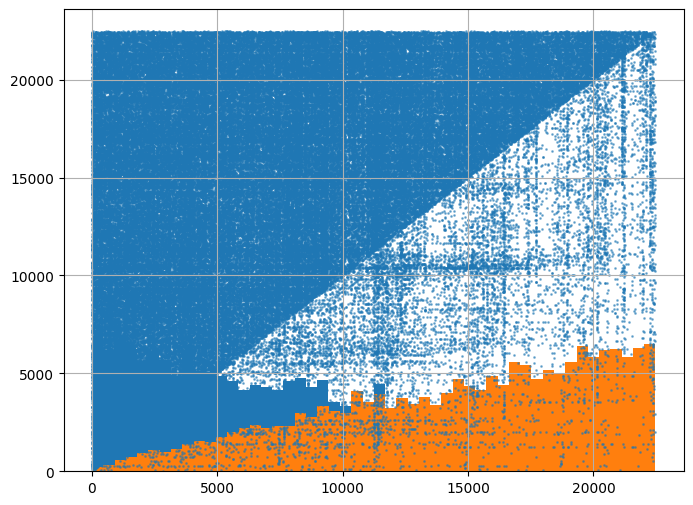

In [ ]:
missing_values = data.isnull().sum()
data.describe()
data['id_1'].hist(bins=50, figsize=(8,6))
data['id_2'].hist(bins=50, figsize=(8,6))
plt.scatter(data['id_1'], data['id_2'], alpha=0.5, s=1)

## Data Preprocessing

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

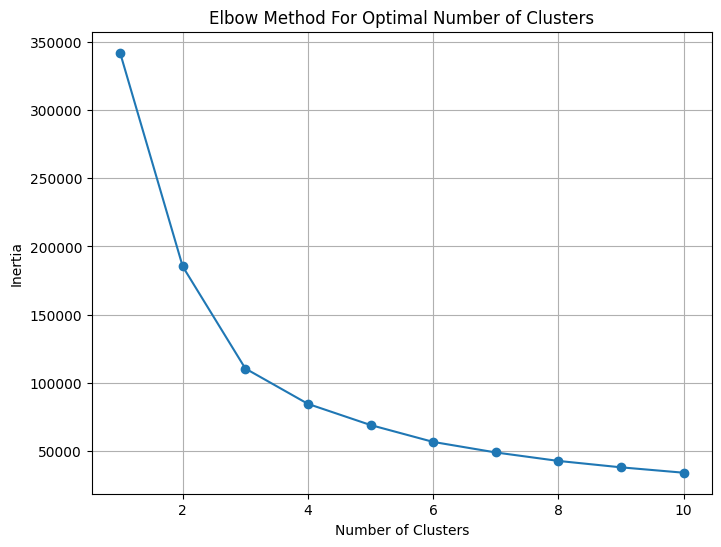

In [ ]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow method
inertias = []
cluster_range = range(1, 11)

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(data_standardized)
    inertias.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertias, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [ ]:
data = data.drop_duplicates()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_standardized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

## Clustering

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_standardized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Anomaly Detection

In [ ]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
data['Anomaly_IF'] = iso_forest.fit_predict(data_standardized)
from sklearn.svm import OneClassSVM
one_class_svm = OneClassSVM(kernel='rbf', nu=0.05)
data['Anomaly_OCSVM'] = one_class_svm.fit_predict(data_standardized)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


## Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error


# Since our dataset is edge-based (id_1 and id_2 representing edges), we'll consider id_1 as features and id_2 as target for demonstration purposes
X = data[['id_1']]
y = data['id_2']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((136801, 1), (34201, 1))

In [ ]:
!pip install h2o


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=ed51eaa62184a9795377333751ea39dd87b4c6ab1628ed7472a6de304735ba3d
  Stored in directory: /root/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
Successfully built h2o


In [ ]:
import h2o

h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpzjbjz408
  JVM stdout: /tmp/tmpzjbjz408/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpzjbjz408/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,"14 days, 15 hours and 29 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_n1vche
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
h2o_frame = h2o.H2OFrame(data)
train, test = h2o_frame.split_frame([0.8], seed=42)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
train

id_1,id_2,Cluster,Anomaly_IF,Anomaly_OCSVM
0,18427,0,1,1
1,21708,0,-1,-1
1,22208,0,-1,-1
1,22171,0,-1,-1
1,6829,1,1,1
1,16590,0,1,1
1,20135,0,1,1
1,8894,1,1,-1
1,15785,0,1,1
1,10281,1,1,-1


In [ ]:
target = "id_2"
features = h2o_frame.columns
features.remove(target)

In [ ]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_runtime_secs=600, seed=42)
aml.train(x=features, y=target, training_frame=train)


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/8
# GBM base models (used / total),1/4
# XGBoost base models (used / total),2/2
# DRF base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [ ]:
lb = aml.leaderboard
lb.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20231031_21033,2740.07,7.50798e+06,2233.72,nan,7.50798e+06
StackedEnsemble_BestOfFamily_2_AutoML_1_20231031_21033,2740.11,7.50819e+06,2233.74,nan,7.50819e+06
StackedEnsemble_AllModels_2_AutoML_1_20231031_21033,2740.12,7.50824e+06,2233.78,nan,7.50824e+06
StackedEnsemble_BestOfFamily_3_AutoML_1_20231031_21033,2740.14,7.50838e+06,2233.79,nan,7.50838e+06
XGBoost_2_AutoML_1_20231031_21033,2741.83,7.51763e+06,2234.82,nan,7.51763e+06
GBM_4_AutoML_1_20231031_21033,2743.83,7.52859e+06,2237.05,nan,7.52859e+06
StackedEnsemble_BestOfFamily_1_AutoML_1_20231031_21033,2744.08,7.52997e+06,2238.9,nan,7.52997e+06
XGBoost_1_AutoML_1_20231031_21033,2744.38,7.53164e+06,2238.83,nan,7.53164e+06
GBM_3_AutoML_1_20231031_21033,2745.01,7.53509e+06,2239.34,0.273101,7.53509e+06
XGBoost_3_AutoML_1_20231031_21033,2747.67,7.54967e+06,2244.4,nan,7.54967e+06


In [ ]:
predictions = aml.leader.predict(test)


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
predictions

predict
22206
16353.8
17813.9
9704.55
9704.55
9704.55
9716.57
6335.28
17029.2
21322.7


In [ ]:
h2o.shutdown()

H2O session _sid_a39a closed.


<ipython-input-25-1edf85295eae>:1: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()


Ensembeled Models

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the Random Forest model using Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_rf


27331686.317115985

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting model
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb.predict(X_test)

# Evaluate the Gradient Boosting model using Mean Squared Error (MSE)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mse_gb


25888779.18887101

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Define the base models
base_models = [
    ('RandomForest', RandomForestRegressor(n_estimators=50, random_state=42)),
    ('GradientBoosting', GradientBoostingRegressor(n_estimators=50, random_state=42))
]

# Initialize the Stacking Regressor with a linear regression meta-model
stacked_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Train the model
stacked_model.fit(X_train, y_train)

# Predict on the test set
y_pred_stacked = stacked_model.predict(X_test)

# Evaluate the Stacking model using Mean Squared Error (MSE)
mse_stacked = mean_squared_error(y_test, y_pred_stacked)
mse_stacked


25602680.174214177